In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import pylab as pl 
import numpy as np 


In [2]:
df=pd.read_csv("FuelConsumption.csv")

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf=df[["ENGINESIZE",'CYLINDERS','FUELCONSUMPTION_COMB',"CO2EMISSIONS"]]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


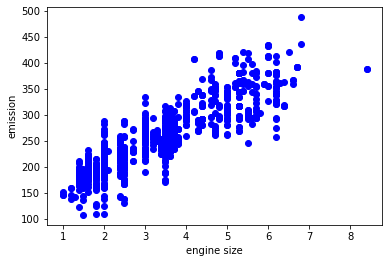

In [5]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color="blue")
plt.xlabel("engine size")
plt.ylabel("emission")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
y=np.array(cdf.CO2EMISSIONS).reshape(1067,1)

x=np.array(cdf.ENGINESIZE).reshape(1067,1)
x.shape

(1067, 1)

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [29]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import linear_model
poly=PolynomialFeatures(degree=3)
train_p=poly.fit_transform(x_train)
train_p

array([[  1.   ,   1.4  ,   1.96 ,   2.744],
       [  1.   ,   4.4  ,  19.36 ,  85.184],
       [  1.   ,   3.   ,   9.   ,  27.   ],
       ...,
       [  1.   ,   4.4  ,  19.36 ,  85.184],
       [  1.   ,   1.8  ,   3.24 ,   5.832],
       [  1.   ,   5.6  ,  31.36 , 175.616]])

In [30]:
clf=linear_model.LinearRegression()
clf.fit(train_p,y_train)

LinearRegression()

In [26]:
x_grid = np.arange(min(x), max(x),0.1)
x_grid = x_grid.reshape(-1,1)
x_grid

array([[1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4],
       [1.5],
       [1.6],
       [1.7],
       [1.8],
       [1.9],
       [2. ],
       [2.1],
       [2.2],
       [2.3],
       [2.4],
       [2.5],
       [2.6],
       [2.7],
       [2.8],
       [2.9],
       [3. ],
       [3.1],
       [3.2],
       [3.3],
       [3.4],
       [3.5],
       [3.6],
       [3.7],
       [3.8],
       [3.9],
       [4. ],
       [4.1],
       [4.2],
       [4.3],
       [4.4],
       [4.5],
       [4.6],
       [4.7],
       [4.8],
       [4.9],
       [5. ],
       [5.1],
       [5.2],
       [5.3],
       [5.4],
       [5.5],
       [5.6],
       [5.7],
       [5.8],
       [5.9],
       [6. ],
       [6.1],
       [6.2],
       [6.3],
       [6.4],
       [6.5],
       [6.6],
       [6.7],
       [6.8],
       [6.9],
       [7. ],
       [7.1],
       [7.2],
       [7.3],
       [7.4],
       [7.5],
       [7.6],
       [7.7],
       [7.8],
       [7.9],
       [8. ],
      

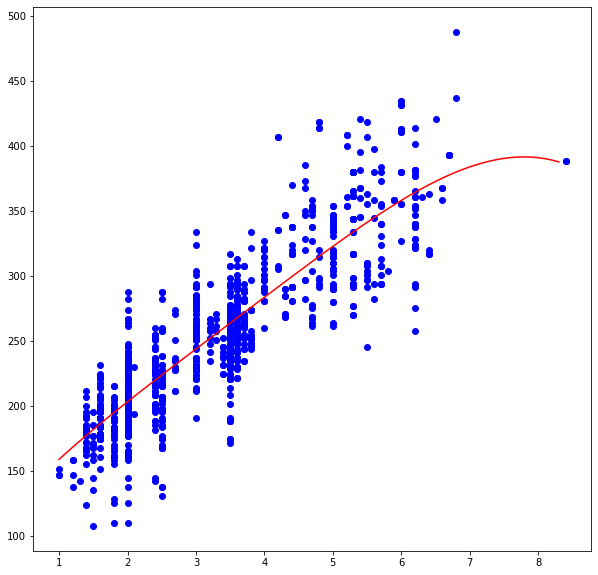

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(x,y,color="blue")
plt.plot(x_grid, clf.predict(poly.fit_transform(x_grid)),'-r')

In [36]:
from sklearn.metrics import r2_score
test_p=poly.fit_transform(x_test)
ypred=clf.predict(test_p)

In [39]:
print("Polynomial Regression R_Square Score: " ,r2_score(y_test,ypred))


Polynomial Regression R_Square Score:  0.7701245696899559
